In [94]:
import pandas as pd
from matplotlib import pyplot as plt
import json

In [95]:
linea_amiga = pd.read_csv('data/linea_amiga.csv', sep=";")
linea_amiga.head()

,FECHA_RECEPCION,HORA_RECEPCION,HORA_FINALIZACION,DUR_LLAMADA,SEXO,EDAD,GRUPO_EDAD,ESTADO_CIVIL,EDUCA,OCUPACION,DEPARTAMENTO,MUNICIPIO,COMUNA,TIPO_INTERVENCION,COMPONENTE,AREA1_INFORM,TEMA1_INFORM,TIPO_SEGUIM,ESTAD_SEGUIM
0,27/08/2019,18:48,18:49,0:01,F,22,20-24,SOLTERO,SECUNDARIA COMPLETA,DESEMPLEADO,ANTIOQUIA,MEDELLIN,CASTILLA,INFORMACION,SALUD FAMILIAR,PROGRAMAS Y PROYECTOS DE LA SECRETARIA DE SALU...,SER CAPAZ,NO NECESARIO,CERRADO
1,27/08/2019,18:49,18:51,0:01,F,23,20-24,SOLTERO,SECUNDARIA INCOMPLETA,DESEMPLEADO,ANTIOQUIA,MEDELLIN,SANTA CRUZ,INFORMACION,SALUD FAMILIAR,PROGRAMAS Y PROYECTOS DE LA SECRETARIA DE SALU...,SER CAPAZ,NO NECESARIO,CERRADO
2,28/08/2019,18:55,18:56,0:01,F,48,45-49,SOLTERO,SECUNDARIA COMPLETA,DESEMPLEADO,ANTIOQUIA,MEDELLIN,ARANJUEZ,INFORMACION,SALUD FAMILIAR,PROGRAMAS Y PROYECTOS DE LA SECRETARIA DE SALU...,SER CAPAZ,NO NECESARIO,CERRADO
3,28/08/2019,8:22,10:06,1:44,F,48,45-49,UNION LIBRE,SECUNDARIA COMPLETA,OFICIOS DEL HOGAR,ANTIOQUIA,MEDELLIN,EL POBLADO,INFORMACION,SALUD FAMILIAR,SD,SD,NO NECESARIO,CERRADO
4,28/08/2019,10:06,10:18,0:11,F,41,40-44,CASADO,SECUNDARIA COMPLETA,OFICIOS DEL HOGAR,ANTIOQUIA,MEDELLIN,POPULAR,INFORMACION,SALUD FAMILIAR,PROGRAMAS Y PROYECTOS DE LA SECRETARIA DE SALU...,SER CAPAZ,NO NECESARIO,CERRADO


In [96]:
ocupacion_hotelera = pd.read_csv('data/porcentaje_ocupacion_hotelera_mensual_de_medellin.csv', sep=";")
ocupacion_hotelera.head()

,ocu_periodo,ocu_indicador,ocu_valor
0,202205,OCUPA_HOTELERA,72.5
1,202204,OCUPA_HOTELERA,76.9
2,202204,OCUPA_HOTELERA,76.9
3,202203,OCUPA_HOTELERA,77.6
4,202203,OCUPA_HOTELERA,77.6


In [97]:
bovinos_yopal = pd.read_csv('data/Sacrificio_de_Bovino_de_Yopal.csv')
bovinos_yopal = bovinos_yopal[['año', 'mes', 'Sacrificio totales']]
bovinos_yopal.columns = ['año', 'mes', 'total_sacrificios']
bovinos_yopal.head()

,año,mes,total_sacrificios
0,2017,Enero,1669
1,2017,Febrero,1589
2,2017,Marzo,1882
3,2017,Abril,1716
4,2017,Mayo,2092


In [98]:
porcinos_yopal = pd.read_csv('data/Sacrificio_de_Porcinos_de_Yopal.csv')
porcinos_yopal.head()

,año,mes,Sacrificios Porcinos Machos,Sacrificio Porcinos Hembras,Sacrificio totales,Latitud,Longitud
0,2017,Enero,132,284,416,5.2606,-72.4013
1,2017,Febrero,258,259,517,5.2606,-72.4013
2,2017,Marzo,323,290,613,5.2606,-72.4013
3,2017,Abril,260,311,571,5.2606,-72.4013
4,2017,Mayo,235,342,577,5.2606,-72.4013


In [99]:
medidas_clima = pd.read_csv('data/medidas_de_clima.csv', skiprows=2)
medidas_clima.head()

,Unnamed: 0,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,24.84,25.01,25.30,25.06,24.55,23.90,23.94,24.17,24.23,24.27,24.33,24.34
1,1902,24.54,24.83,24.92,24.78,24.36,23.88,23.76,24.17,24.18,24.30,24.55,24.46
2,1903,24.54,25.00,25.01,24.75,24.37,23.91,23.94,24.17,24.42,24.28,24.35,24.29
3,1904,24.45,25.03,24.87,24.92,24.22,24.08,23.93,24.17,24.42,24.22,24.45,24.32
4,1905,24.43,24.69,24.83,24.79,24.19,23.84,23.94,24.17,24.42,24.34,24.45,24.25


In [100]:
nuevas_columnas = list(medidas_clima.columns)
nuevas_columnas[0] = "Year"
medidas_clima.columns = nuevas_columnas

In [101]:
medidas_clima = medidas_clima.melt(id_vars="Year")
medidas_clima['date'] = medidas_clima[['Year', 'variable']].apply(lambda x: str(x['Year']) + '-' + x['variable'],axis=1)
medidas_clima['date'] = pd.to_datetime(medidas_clima['date'])

In [102]:
medidas_clima = medidas_clima[['date', 'value']]

In [103]:
medidas_clima.set_index('date', drop=False,)
clima = medidas_clima['value']

<AxesSubplot: >

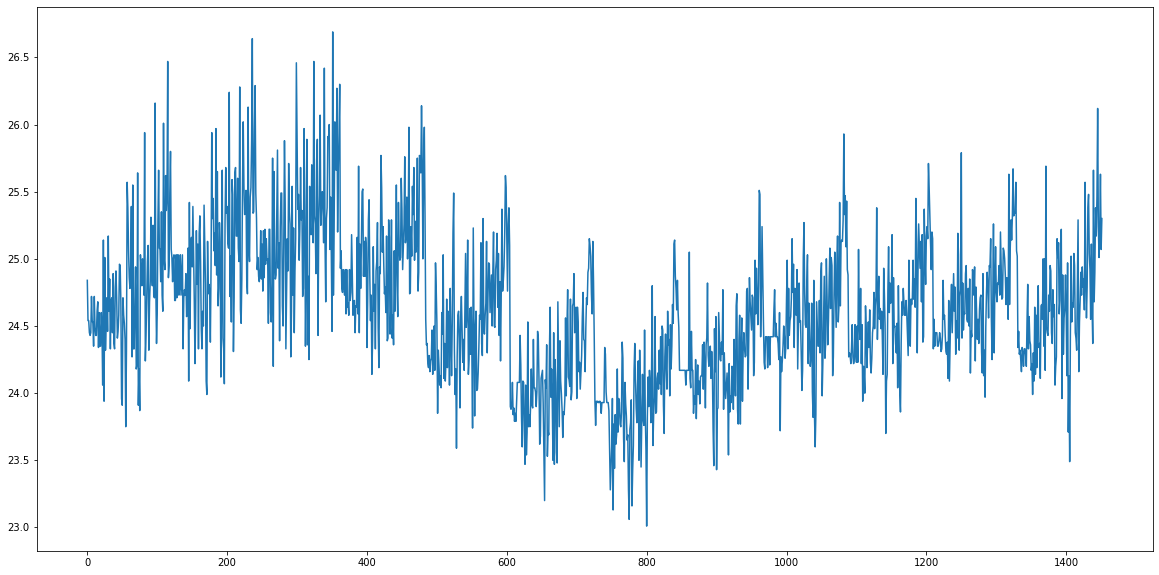

In [104]:
figure, axis = plt.subplots(1, 1, figsize=(20,10))
clima.plot()

In [105]:
meses = open('assets/meses.json')
meses = meses.read()
meses = json.loads(meses)

In [106]:
bovinos_yopal.head()

,año,mes,total_sacrificios
0,2017,Enero,1669
1,2017,Febrero,1589
2,2017,Marzo,1882
3,2017,Abril,1716
4,2017,Mayo,2092


In [107]:
bovinos_yopal['mes'] = bovinos_yopal['mes'].apply(lambda x: meses[x])
bovinos_yopal['date'] = bovinos_yopal['año'].astype(str) + '-' + bovinos_yopal['mes']
bovinos_yopal = bovinos_yopal[['date', 'total_sacrificios']]
bovinos_yopal.set_index('date', drop=False, inplace=True)
bovinos_yopal.head()

,date,total_sacrificios
date,,
2017-01,2017-01,1669
2017-02,2017-02,1589
2017-03,2017-03,1882
2017-04,2017-04,1716
2017-05,2017-05,2092


<AxesSubplot: xlabel='date'>

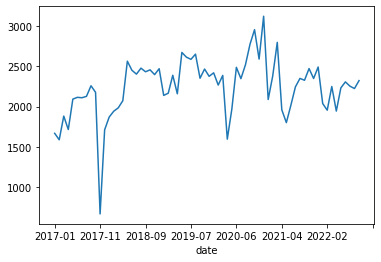

In [108]:
total_sacrificios = bovinos_yopal['total_sacrificios']

<AxesSubplot: xlabel='date'>

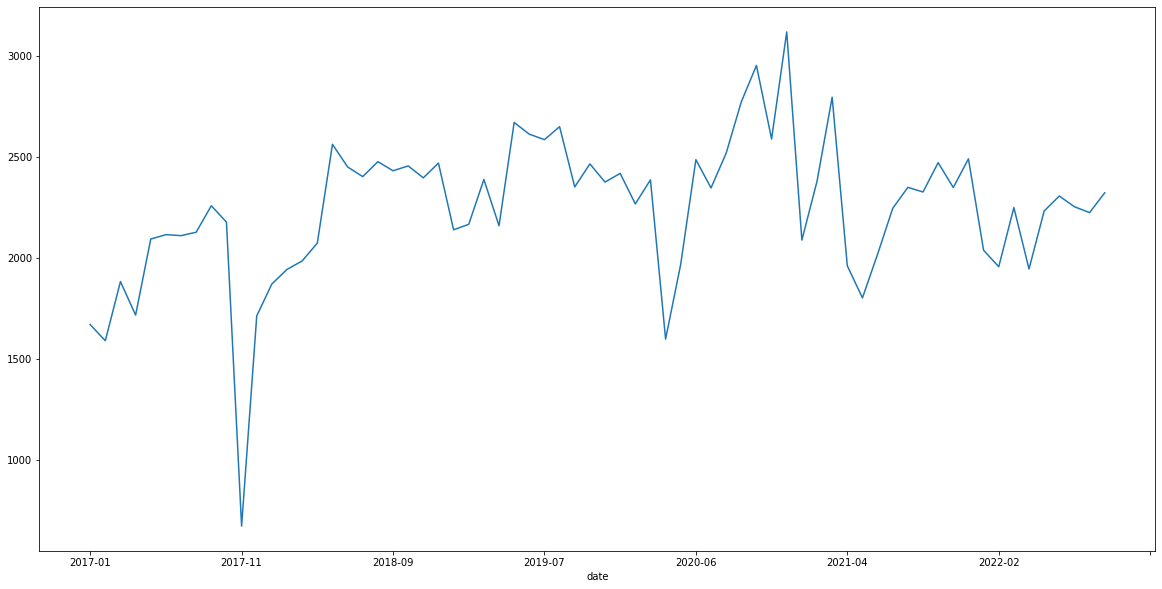

In [109]:
figure, axis = plt.subplots(1, 1, figsize=(20,10))
total_sacrificios.plot()